11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
2143/2143 [==============================] - 249s 116ms/step - loss: 0.1141 - val_loss: 0.0989
Epoch 2/5
2143/2143 [==============================] - 244s 114ms/step - loss: 0.0968 - val_loss: 0.0949
Epoch 3/5
2143/2143 [==============================] - 241s 113ms/step - loss: 0.0944 - val_loss: 0.0937
Epoch 4/5
2143/2143 [==============================] - 240s 112ms/step - loss: 0.0932 - val_loss: 0.0924
Epoch 5/5
313/313 [==============================] - 10s 33ms/step


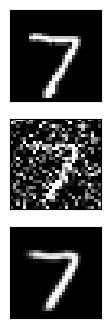

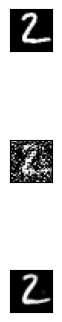

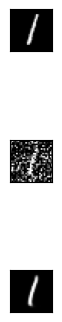

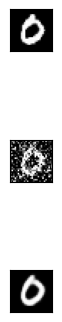

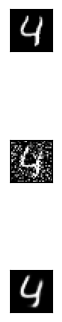

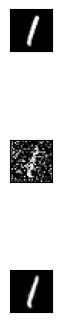

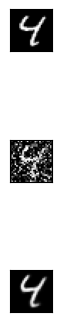

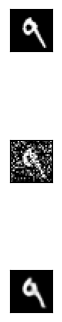

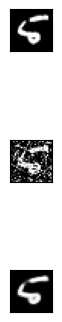

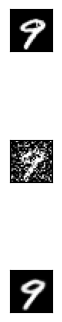

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
input_img = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
encoded = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train,
 epochs=5,
 batch_size=28,
 shuffle=True,
 validation_data=(x_test_noisy, x_test))
denoised_images = autoencoder.predict(x_test_noisy)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

 ax = plt.subplot(3, n, i + 1)
 plt.imshow(x_test[i].reshape(28, 28))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
 ax = plt.subplot(3, n, i + 1 + n)
 plt.imshow(x_test_noisy[i].reshape(28, 28))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
 ax = plt.subplot(3, n, i + 1 + 2 * n)
 plt.imshow(denoised_images[i].reshape(28, 28))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
 plt.show()